In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)





In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
#Take timestamp of right now and show that
df['timestamp'] = pd.to_datetime('now')


In [5]:

def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

    
    #check if file under this name
    if not os.path.isfile("API.csv"):
        df.to_csv('API.csv',header = 'column_names')
    else:
        df.to_csv('API.csv',mode = 'a',header = False)

In [6]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(2) #sleep for 1 minute
exit()

API Runner Completed
API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906286e+07,1.906286e+07,NaN,1,NaN,NaN,2022-06-09T14:27:00.000Z,30201.155817,2.440094e+10,-41.8338,0.150122,-1.263879,1.117410,-4.830244,-29.186415,-23.308498,5.757203e+11,46.4183,6.342243e+11,2022-06-09T14:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-09 14:28:02.775304,NaT
1,1027,Ethereum,ETH,ethereum,5744,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.211084e+08,1.211084e+08,NaN,2,NaN,NaN,2022-06-09T14:26:00.000Z,1796.780659,1.335995e+10,-41.2208,-0.031474,-0.976176,-0.013087,-25.444816,-44.650404,-31.511228,2.176053e+11,17.5448,2.176053e+11,2022-06-09T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-09 14:28:02.775304,NaT
2,825,Tether,USDT,tether,34504,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.243055e+10,7.971362e+10,NaN,3,NaN,NaN,2022-06-09T14:26:00.000Z,0.999406,4.631628e+10,-33.1688,-0.002706,0.000866,0.007883,-0.055863,-0.095600,-0.097484,7.238755e+10,5.8358,7.966630e+10,2022-06-09T14:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-09 14:28:02.775304,NaT
3,3408,USD Coin,USDC,usd-coin,4326,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.361642e+10,5.361642e+10,NaN,4,NaN,NaN,2022-06-09T14:26:00.000Z,1.000272,3.663544e+09,-36.6755,0.031558,0.030291,-0.002494,0.012396,0.086285,0.081019,5.363098e+10,4.3228,5.363098e+10,2022-06-09T14:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-09 14:28:02.775304,NaT
4,1839,BNB,BNB,bnb,943,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-09T14:26:00.000Z,290.524563,8.496648e+08,-42.6596,0.077597,-0.589245,-3.342581,-10.644841,-31.184550,-22.479107,4.743597e+10,3.8247,4.797047e+10,2022-06-09T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-09 14:28:02.775304,NaT
5,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.375257e+10,3.427770e+10,NaN,6,NaN,NaN,2022-06-09T14:26:00.000Z,0.641334,1.357125e+09,-29.1494,-0.150269,-2.040920,12.919692,-5.951724,-38.062654,-20.480266,2.164667e+10,1.7448,2.886003e+10,2022-06-09T14:26:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-09 14:28:02.775304,NaT
6,52,XRP,XRP,xrp,737,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,2022-06-09T14:27:00.000Z,0.399783,9.846968e+08,-36.3226,0.270412,-0.393393,0.938532,-23.527741,-47.400434,-46.053447,1.932676e+10,1.5582,3.997832e+10,2022-06-09T14:27:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-09 14:28:02.775304,NaT
7,4687,Binance USD,BUSD,binance-usd,3822,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.792816e+10,1.792816e+10,NaN,8,NaN,NaN,2022-06-09T14:26:00.000Z,1.001770,4.662150e+09,-33.1708,-0.016664,0.140645,0.197570,0.192433,0.330385,0.154442,1.795989e+10,1.4479,1.795989e+10,2022-06-09T14:26:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-09 14:28:02.775304,NaT
8,5426,Solana,SOL,solana,327,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.4175

In [8]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19062856.00000,19062856.00000,NaN,1,NaN,NaN,2022-06-09T14:27:00.000Z,30201.15582,24400943912.03436,-41.83380,0.15012,-1.26388,1.11741,-4.83024,-29.18642,-23.30850,575720284363.69971,46.41830,634224272146.71997,2022-06-09T14:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-09 14:28:02.775304,NaT
1,1027,Ethereum,ETH,ethereum,5744,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121108431.49900,121108431.49900,NaN,2,NaN,NaN,2022-06-09T14:26:00.000Z,1796.78066,13359950166.23642,-41.22080,-0.03147,-0.97618,-0.01309,-25.44482,-44.65040,-31.51123,217605287326.48685,17.54480,217605287326.48999,2022-06-09T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-09 14:28:02.775304,NaT
2,825,Tether,USDT,tether,34504,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,72430549552.51900,79713622660.05322,NaN,3,NaN,NaN,2022-06-09T14:26:00.000Z,0.99941,46316281699.94662,-33.16880,-0.00271,0.00087,0.00788,-0.05586,-0.09560,-0.09748,72387552077.12865,5.83580,79666301680.86000,2022-06-09T14:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-09 14:28:02.775304,NaT
3,3408,USD Coin,USDC,usd-coin,4326,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,53616417524.99559,53616417524.99559,NaN,4,NaN,NaN,2022-06-09T14:26:00.000Z,1.00027,3663543596.42661,-36.67550,0.03156,0.03029,-0.00249,0.01240,0.08628,0.08102,53630976149.18089,4.32280,53630976149.18000,2022-06-09T14:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-09 14:28:02.775304,NaT
4,1839,BNB,BNB,bnb,943,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,2022-06-09T14:26:00.000Z,290.52456,849664762.85640,-42.65960,0.07760,-0.58924,-3.34258,-10.64484,-31.18455,-22.47911,47435971752.02892,3.82470,47970474593.22000,2022-06-09T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-09 14:28:02.775304,NaT
5,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33752565071.28800,34277702081.60500,NaN,6,NaN,NaN,2022-06-09T14:26:00.000Z,0.64133,1357125465.53668,-29.14940,-0.15027,-2.04092,12.91969,-5.95172,-38.06265,-20.48027,21646670684.61699,1.74480,28860034155.93000,2022-06-09T14:26:00.000Z,1839.00000,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-09 14:28:02.775304,NaT
6,52,XRP,XRP,xrp,737,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,7,NaN,NaN,2022-06-09T14:27:00.000Z,0.39978,984696846.46178,-36.32260,0.27041,-0.39339,0.93853,-23.52774,-47.40043,-46.05345,19326758681.27961,1.55820,39978317904.19000,2022-06-09T14:27:00.000Z,1839.00000,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-09 14:28:02.775304,NaT
7,4687,Binance USD,BUSD,binance-usd,3822,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17928164735.99926,17928164735.99926,NaN,8,NaN,NaN,2022-06-09T14:26:00.000Z,1.00177,4662150474.83779,-33.17080,-0.01666,0.14064,0.19757,0.19243,0.33039,0.15444,17959893145.80729,1.44790,17959893145.81000,2022-06-09T14:26:00.000Z,

In [10]:
df3 = df.groupby('name',sort =False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.16508,-1.22803,1.16152,-4.71077,-29.14570,-23.34927
Ethereum,-0.03486,-0.97803,-0.00227,-25.43441,-44.64568,-31.54038
Tether,-0.00510,0.00374,0.00494,-0.05798,-0.09991,-0.10173
USD Coin,0.03166,0.02804,-0.00426,0.00820,0.08732,0.07879
BNB,0.07033,-0.61063,-3.36143,-10.64984,-31.18177,-22.50421
Cardano,-0.14866,-2.09035,12.90943,-5.94773,-38.05954,-20.50705
XRP,0.23926,-0.41363,0.97175,-23.43080,-47.38910,-46.08001
Binance USD,-0.11293,0.03065,0.03527,0.04800,0.14815,0.06873
Solana,0.17660,1.70245,0.35389,-43.77424,-63.81889,-51.24186


In [11]:
#put the data into a series
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h      0.16508
                 quote.USD.percent_change_24h    -1.22803
                 quote.USD.percent_change_7d      1.16152
                 quote.USD.percent_change_30d    -4.71077
                 quote.USD.percent_change_60d   -29.14570
                 quote.USD.percent_change_90d   -23.34927
Ethereum         quote.USD.percent_change_1h     -0.03486
                 quote.USD.percent_change_24h    -0.97803
                 quote.USD.percent_change_7d     -0.00227
                 quote.USD.percent_change_30d   -25.43441
                 quote.USD.percent_change_60d   -44.64568
                 quote.USD.percent_change_90d   -31.54038
Tether           quote.USD.percent_change_1h     -0.00510
                 quote.USD.percent_change_24h     0.00374
                 quote.USD.percent_change_7d      0.00494
                 quote.USD.percent_change_30d    -0.05798
                 quote.USD

In [12]:
df5 = df4.to_frame(name='values')
df5

values
name                                                  
Bitcoin         quote.USD.percent_change_1h    0.16508
                quote.USD.percent_change_24h  -1.22803
                quote.USD.percent_change_7d    1.16152
                quote.USD.percent_change_30d  -4.71077
                quote.USD.percent_change_60d -29.14570
                quote.USD.percent_change_90d -23.34927
Ethereum        quote.USD.percent_change_1h   -0.03486
                quote.USD.percent_change_24h  -0.97803
                quote.USD.percent_change_7d   -0.00227
                quote.USD.percent_change_30d -25.43441
                quote.USD.percent_change_60d -44.64568
                quote.USD.percent_change_90d -31.54038
Tether          quote.USD.percent_change_1h   -0.00510
                quote.USD.percent_change_24h   0.00374
                quote.USD.percent_change_7d    0.00494
                quote.USD.percent_change_30d  -0.05798
                quote.USD.percent_change_60d  -0.09991
                quote.USD.percent_change_90d  -0.10173
USD Coin        quote.USD.percent_change_1h    0.03166
                quote.USD.percent_change_24h   0.02804
                quote.USD.percent_change_7d   -0.00426
                quote.USD.percent_change_30d   0.00820
                quote.USD.percent_change_60d   0.08732
                quote.USD.percent_change_90d   0.07879
BNB             quote.USD.percent_change_1h    0.07033
                quote.USD.percent_change_24h  -0.61063
                quote.USD.percent_change_7d   -3.36143
                quote.USD.percent_change_30d -10.64984
                quote.USD.percent_change_60d -31.18177
                quote.USD.percent_change_90d -22.50421
Cardano         quote.USD.percent_change_1h   -0.14866
                quote.USD.percent_change_24h  -2.09035
                quote.USD.percent_change_7d   12.90943
                quote.USD.percent_change_30d  -5.94773
                quote.USD.percent_change_60d -38.05954
                quote.USD.percent_change_90d -20.50705
XRP             quote.USD.percent_change_1h    0.23926
                quote.USD.percent_change_24h  -0.41363
                quote.USD.percent_change_7d    0.97175
                quote.USD.percent_change_30d -23.43080
                quote.USD.percent_change_60d -47.38910
                quote.USD.percent_change_90d -46.08001
Binance USD     quote.USD.percent_change_1h   -0.11293
                quote.USD.percent_change_24h   0.03065
                quote.USD.percent_change_7d    0.03527
                quote.USD.percent_change_30d   0.04800
                quote.USD.percent_change_60d   0.14815
                quote.USD.percent_change_90d   0.06873
Solana          quote.USD.percent_change_1h    0.17660
                quote.USD.percent_change_24h   1.70245
                quote.USD.percent_change_7d    0.35389
                quote.USD.percent_change_30d -43.77424
                quote.USD.percent_change_60d -63.81889
                quote.USD.percent_change_90d -51.24186
Dogecoin        quote.USD.percent_change_1h    0.12440
                quote.USD.percent_change_24h  -0.46187
                quote.USD.percent_change_7d   -1.68047
                quote.USD.percent_change_30d -30.29358
                quote.USD.percent_change_60d -48.69106
                quote.USD.percent_change_90d -31.86089
Polkadot        quote.USD.percent_change_1h    0.88072
                quote.USD.percent_change_24h   1.40396
                quote.USD.percent_change_7d   -2.31421
                quote.USD.percent_change_30d -22.26072
                quote.USD.percent_change_60d -52.45012
                quote.USD.percent_change_90d -48.90614
Wrapped Bitcoin quote.USD.percent_change_1h    0.06092
                quote.USD.percent_change_24h  -1.28534
                quote.USD.percent_change_7d    0.98515
                quote.USD.percent_change_30d  -5.17202
                quote.USD.percent_change_60d -29.15406
                quote.USD.percent

In [13]:
df5.count()

values    90
dtype: int64

In [14]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.16508
1,Bitcoin,quote.USD.percent_change_24h,-1.22803
2,Bitcoin,quote.USD.percent_change_7d,1.16152
3,Bitcoin,quote.USD.percent_change_30d,-4.71077
4,Bitcoin,quote.USD.percent_change_60d,-29.14570
5,Bitcoin,quote.USD.percent_change_90d,-23.34927
6,Ethereum,quote.USD.percent_change_1h,-0.03486
7,Ethereum,quote.USD.percent_change_24h,-0.97803
8,Ethereum,quote.USD.percent_change_7d,-0.00227
9,Ethereum,quote.USD.percent_change_30d,-25.43441


In [15]:
df7 = df6.rename(columns = {'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.16508
1,Bitcoin,quote.USD.percent_change_24h,-1.22803
2,Bitcoin,quote.USD.percent_change_7d,1.16152
3,Bitcoin,quote.USD.percent_change_30d,-4.71077
4,Bitcoin,quote.USD.percent_change_60d,-29.14570
5,Bitcoin,quote.USD.percent_change_90d,-23.34927
6,Ethereum,quote.USD.percent_change_1h,-0.03486
7,Ethereum,quote.USD.percent_change_24h,-0.97803
8,Ethereum,quote.USD.percent_change_7d,-0.00227
9,Ethereum,quote.USD.percent_change_30d,-25.43441


In [16]:
                        
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.16508
1,Bitcoin,24h,-1.22803
2,Bitcoin,7d,1.16152
3,Bitcoin,30d,-4.71077
4,Bitcoin,60d,-29.14570
5,Bitcoin,90d,-23.34927
6,Ethereum,1h,-0.03486
7,Ethereum,24h,-0.97803
8,Ethereum,7d,-0.00227
9,Ethereum,30d,-25.43441


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

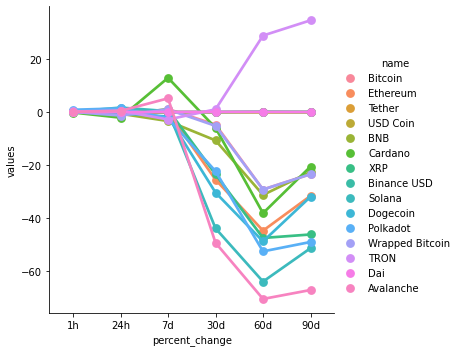

In [18]:
sns.catplot(x='percent_change',y = 'values',hue='name',data=df7,kind ='point')

In [19]:
df0 = df[['name','quote.USD.price','timestamp']]
df0 = df0.query("name == 'Bitcoin'")
df0

,name,quote.USD.price,timestamp
0,Bitcoin,30201.15582,2022-06-09 14:28:02.775304
0,Bitcoin,30201.15582,NaT
0,Bitcoin,30222.12204,NaT
0,Bitcoin,30222.12204,NaT


ValueError: cannot reindex from a duplicate axis

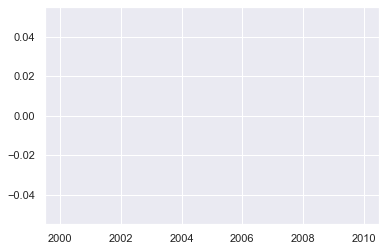

In [20]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df0)